In [1]:
# Advanced Visualisations

In [2]:
# Movie Rating Analytics

In [34]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")
%matplotlib inline

In [35]:
print(os.getcwd())

C:\Users\chida


In [36]:
movies = pd.read_csv(r"C:\Users\chida\Python A-Z_Section 6_Movie-Ratings.csv")

In [37]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film                         559 non-null object
Genre                        559 non-null object
Rotten Tomatoes Ratings %    559 non-null int64
Audience Ratings %           559 non-null int64
Budget (million $)           559 non-null int64
Year of release              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [38]:
len(movies)

559

In [39]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [49]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating',
       'BudgetMillions', 'Year']

In [50]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [51]:
# It doesnt make sence to have years as numbers as we dont want to use it for analysis
# We want to use it as a category
# Convert to categorical variable
movies.describe()


,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [52]:
movies.Film = movies.Film.astype("category")
movies.Genre = movies.Genre.astype("category")
movies.Year = movies.Year.astype("category")
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [53]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [54]:
# This is a good way to get all of the categories of a field
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

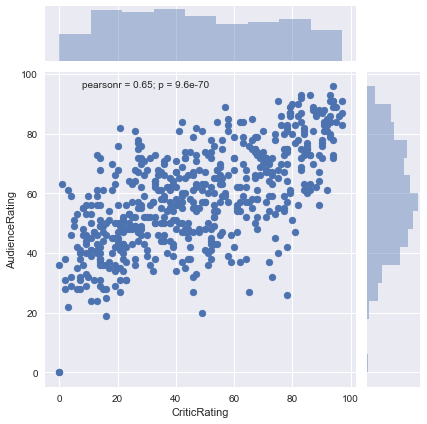

In [57]:
# working with jointplots

j = sns.jointplot(data = movies, x= "CriticRating", y = "AudienceRating" )

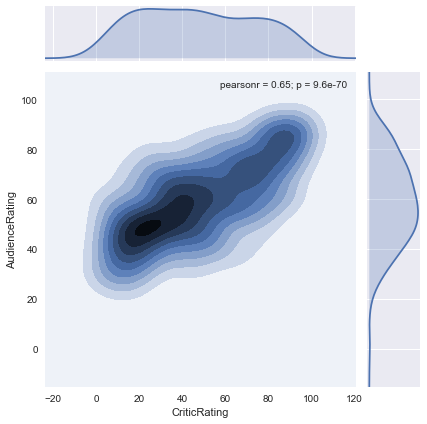

In [64]:
#This allows you to see the clusters better
# types "reg" | "resid" | "kde"

#j = sns.jointplot(data = movies, x= "CriticRating", y = "AudienceRating", kind = "hex" )
#j = sns.jointplot(data = movies, x= "CriticRating", y = "AudienceRating", kind = "reg" )
#j = sns.jointplot(data = movies, x= "CriticRating", y = "AudienceRating", kind = "resid" )
j = sns.jointplot(data = movies, x= "CriticRating", y = "AudienceRating", kind = "kde" )

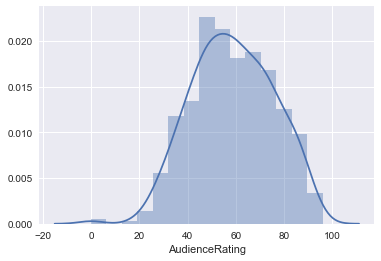

In [75]:
# Histograms

# already know this method 
sns.set_style("darkgrid")
m1 = sns.distplot(movies.AudienceRating, bins =15)

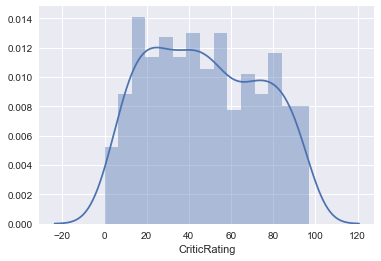

In [76]:
m2 = sns.distplot(movies.CriticRating, bins =15)

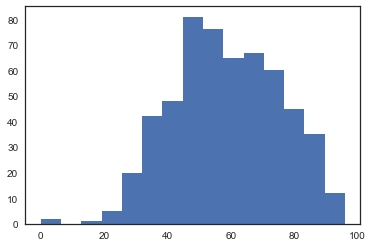

In [77]:
# this is what it would look like without seaborn
sns.set_style("white")
n1 = plt.hist(movies.AudienceRating, bins = 15)

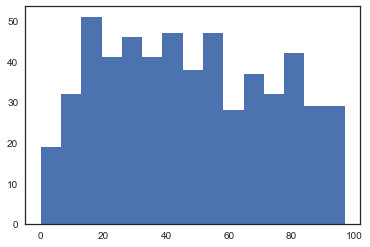

In [74]:
# critics behave differentto audience. 
# critics havemore criteria

n2 = plt.hist(movies.CriticRating, bins = 15)

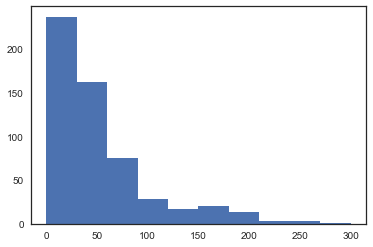

In [80]:
# stacked histograms in python

h1 = plt.hist(movies.BudgetMillions)
plt.show()

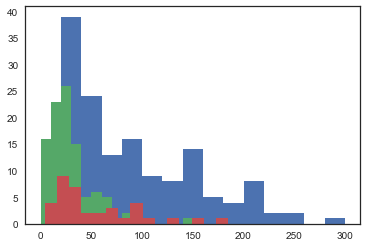

In [88]:
# Filter this by genre


plt.hist(movies[movies.Genre == "Action"].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == "Drama"].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == "Thriller"].BudgetMillions, bins=15)
plt.show()

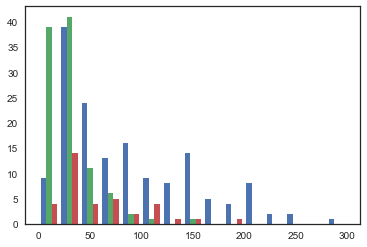

In [97]:
# Create a stacked histogram 
a = movies[movies.Genre == "Action"].BudgetMillions
b = movies[movies.Genre == "Drama"].BudgetMillions
c = movies[movies.Genre == "Thriller"].BudgetMillions

x = [a,b,c]

plt.hist(x, bins=15, stacked=False)
plt.show()

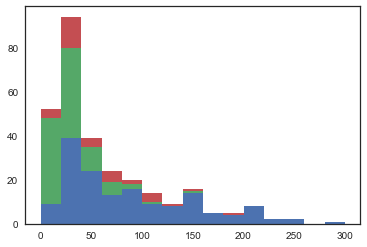

In [98]:
plt.hist(x, bins=15, stacked=True)
plt.show()

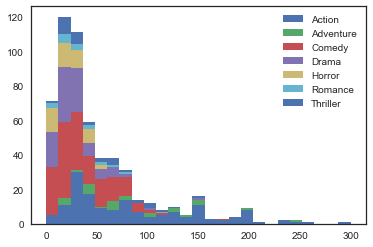

In [111]:
# Create a loop to automate this

x = [] 
y = []
for i in movies.Genre.cat.categories:
    #print(i)
    x.append(movies[movies.Genre == i].BudgetMillions) 
    y.append(i)

#print(x)
plt.hist(x, bins=25, stacked=True, rwidth=1, label=y)
plt.legend()
plt.show()

In [ ]:
# creating a kde plot 
# kirnal density estimate plot

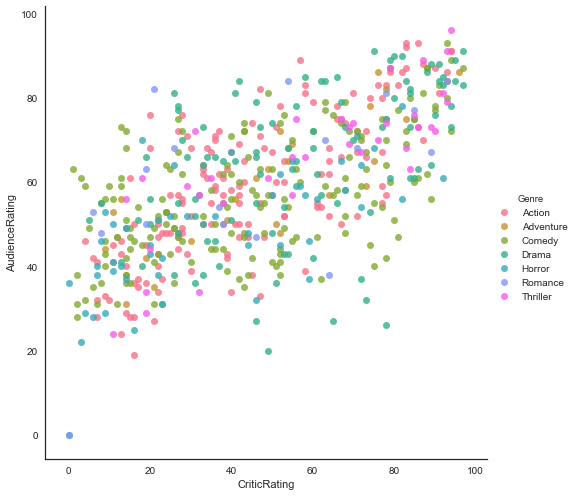

In [116]:
vis1 = sns.lmplot(data=movies, x ="CriticRating", y = "AudienceRating", fit_reg=False, hue = "Genre" ,size=7, aspect=1)

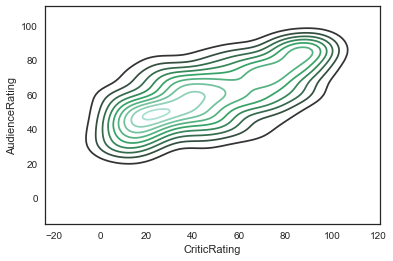

In [117]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating )

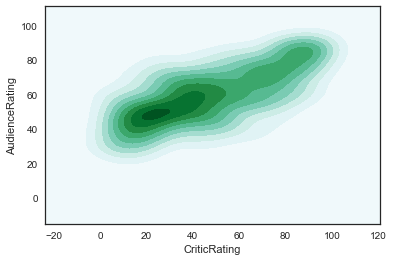

In [119]:
#add shade to it
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                shade=True)

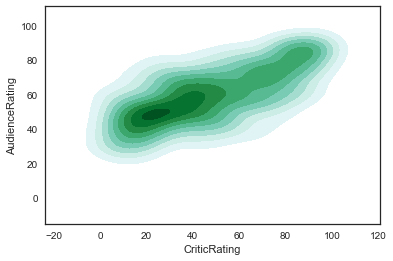

In [120]:
# background?
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                shade=True, shade_lowest=False)

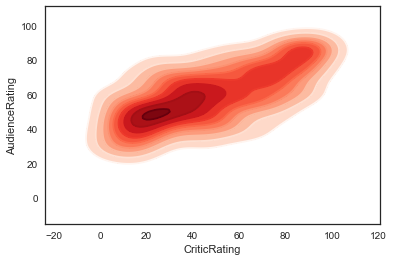

In [122]:
#change the colour
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                shade=True, shade_lowest=False, cmap="Reds")
#tip take off shade to get edges
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                shade=False, shade_lowest=False, cmap="Reds")

In [123]:
# working with subplots()

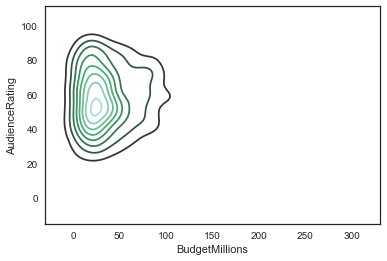

In [129]:

k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)
plt.show()

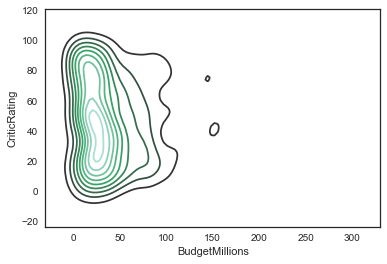

In [135]:
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

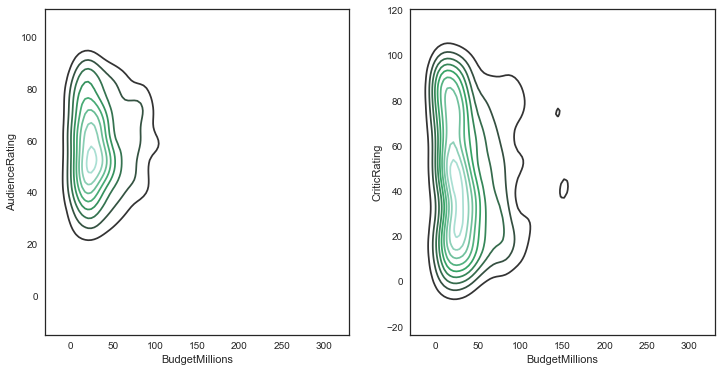

In [137]:
#Allows you to place multiple charts
#1,2 = rows and columns. size needsto match the array
#ax=axes[1] tells it where youwantit to go 

f, axes = plt.subplots(1,2, figsize=(12,6))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])

In [138]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C02C8550F0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001C02B79E048>], dtype=object)

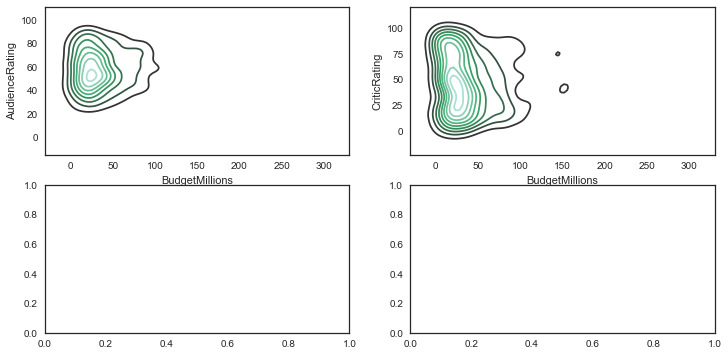

In [139]:
f, axes = plt.subplots(2,2, figsize=(12,6))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1])

[(-20, 160)]

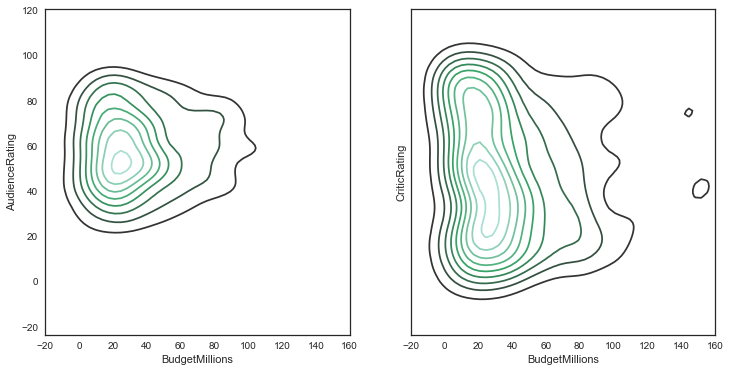

In [143]:
#MAKES THEM HAVE THESAMEXANDY AXIS

f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])
k1.set(xlim=(-20,160))


In [144]:
#DASHBARDS IN PYTHON?

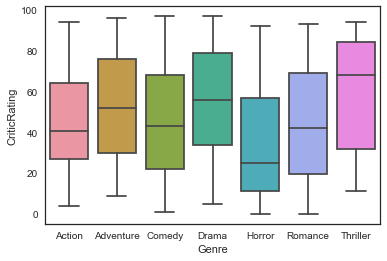

In [146]:
#boxplots show youstuff in quartiles
x = sns.boxplot(data=movies, x="Genre", y="CriticRating")

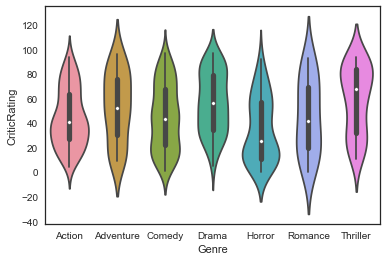

In [145]:
#VIOLINPLOTS VS BOXPLOTS

z = sns.violinplot(data=movies, x="Genre", y="CriticRating")

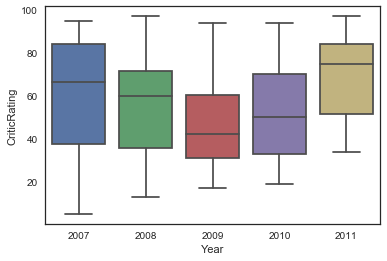

In [150]:
x = sns.boxplot(data=movies[movies.Genre=="Drama"], x="Year", y="CriticRating")

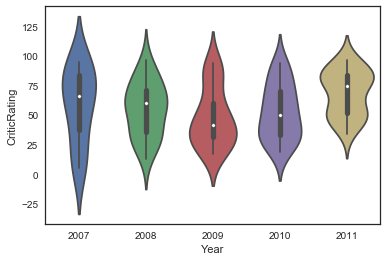

In [151]:
x = sns.violinplot(data=movies[movies.Genre=="Drama"], x="Year", y="CriticRating")

In [152]:
#Creating a facetgrid 

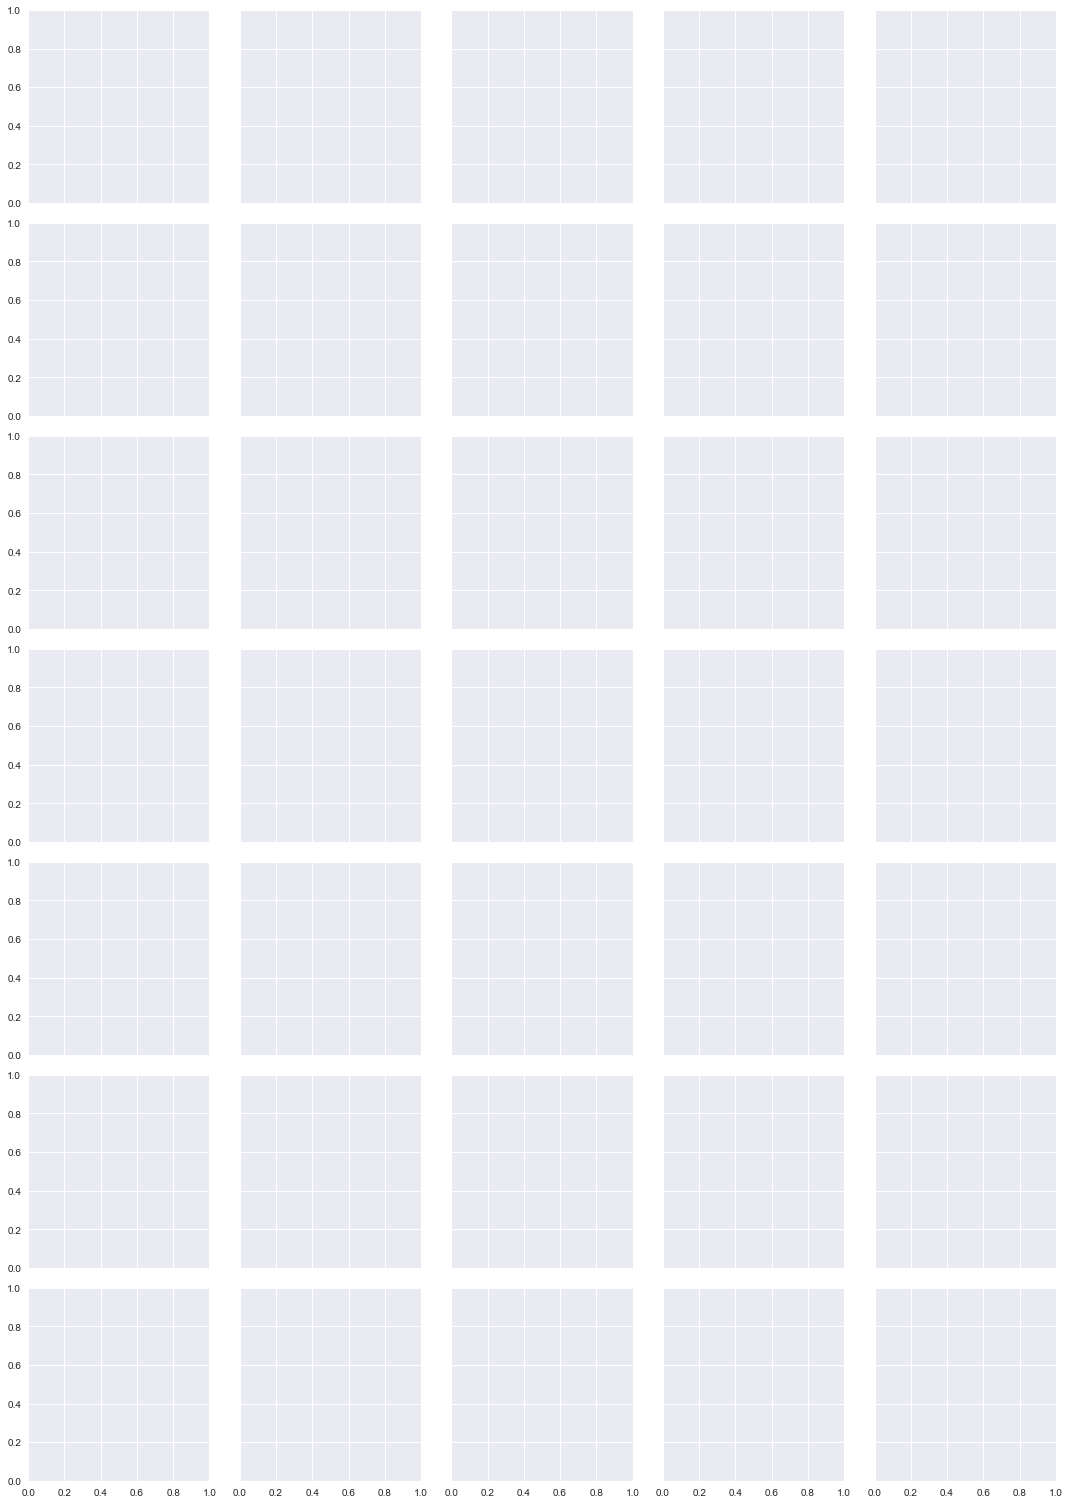

In [160]:
sns.set_style("darkgrid")
g = sns.FacetGrid(movies, row="Genre",col="Year", hue="Genre")

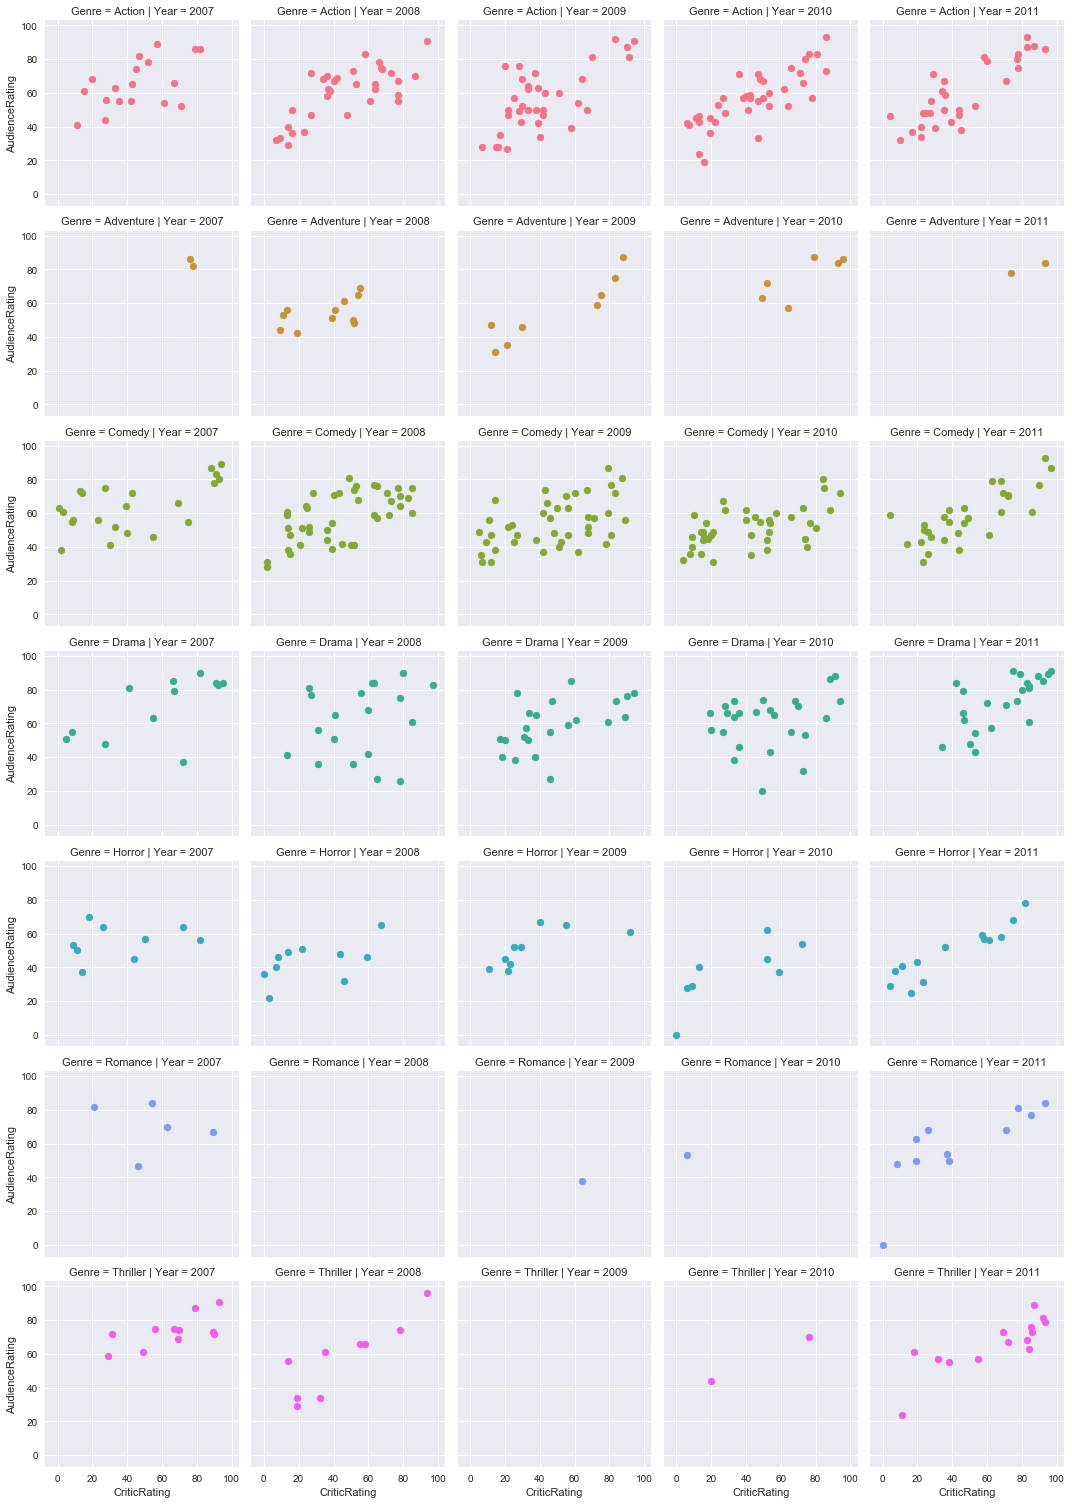

In [166]:
g = sns.FacetGrid(movies, row="Genre",col="Year", hue="Genre")
g = g.map(plt.scatter, "CriticRating", "AudienceRating")
# plt.scatter(movies.CriticRating, movies.AudienceRating)

In [167]:
### YOU CANPOPULATE THESE WITHANY TYPE OF CHART
# EXAMPLE HISTOGRAMS

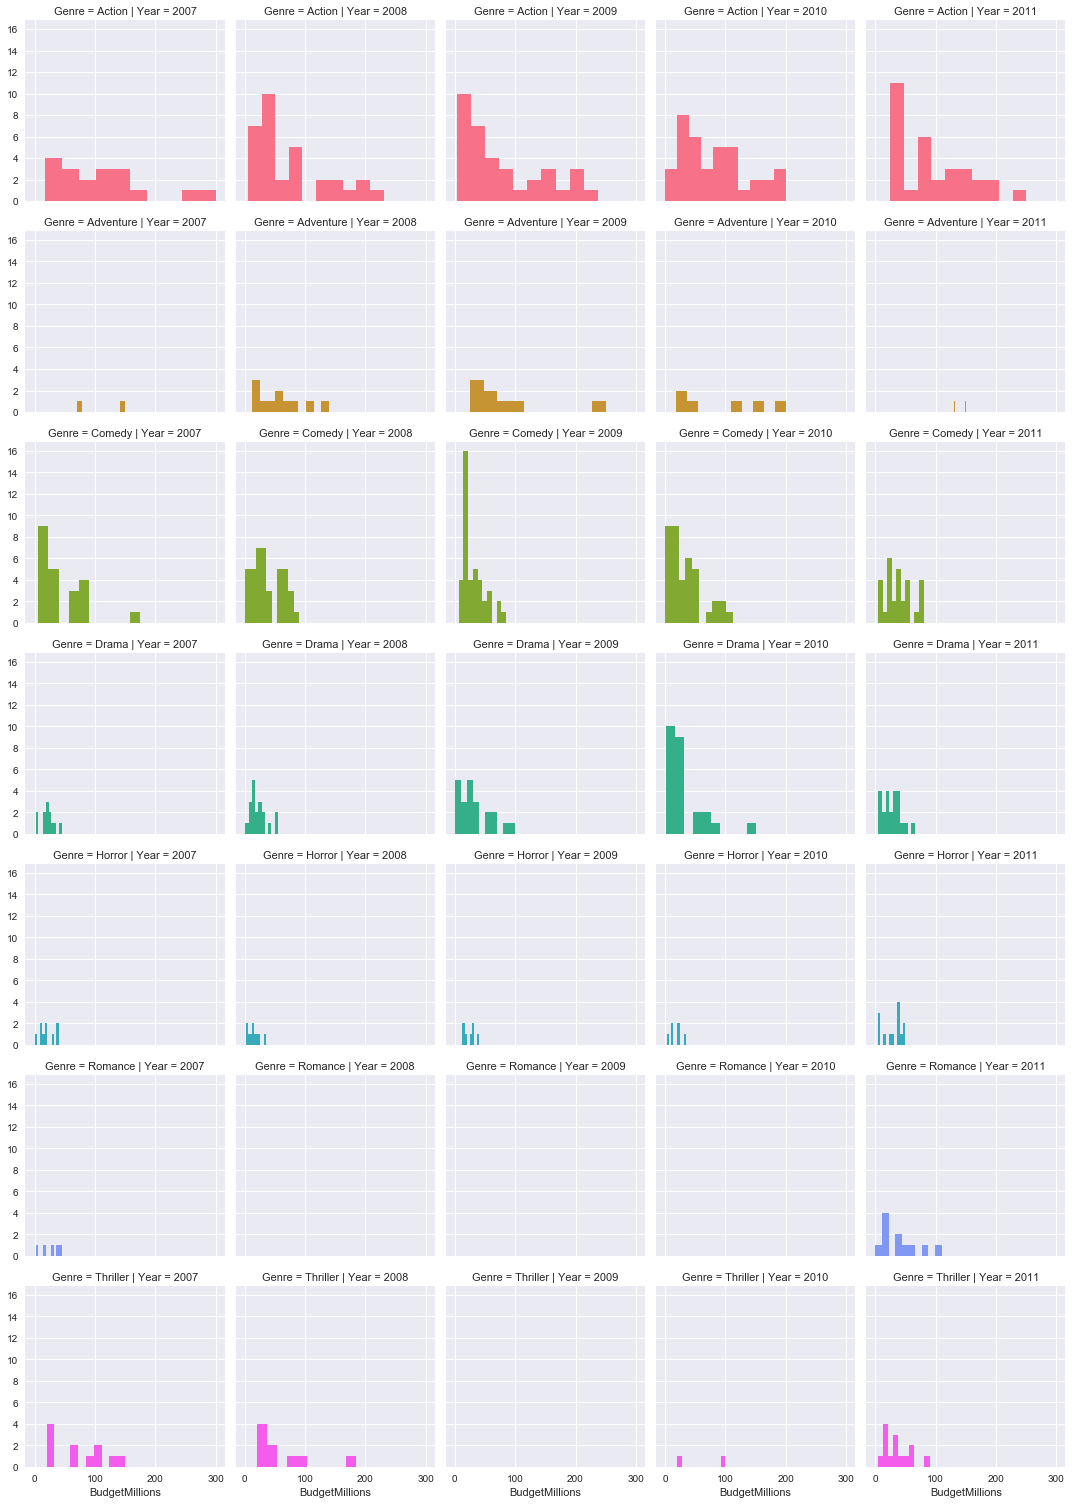

In [170]:
g = sns.FacetGrid(movies, row="Genre",col="Year", hue="Genre")
g = g.map(plt.hist, "BudgetMillions")

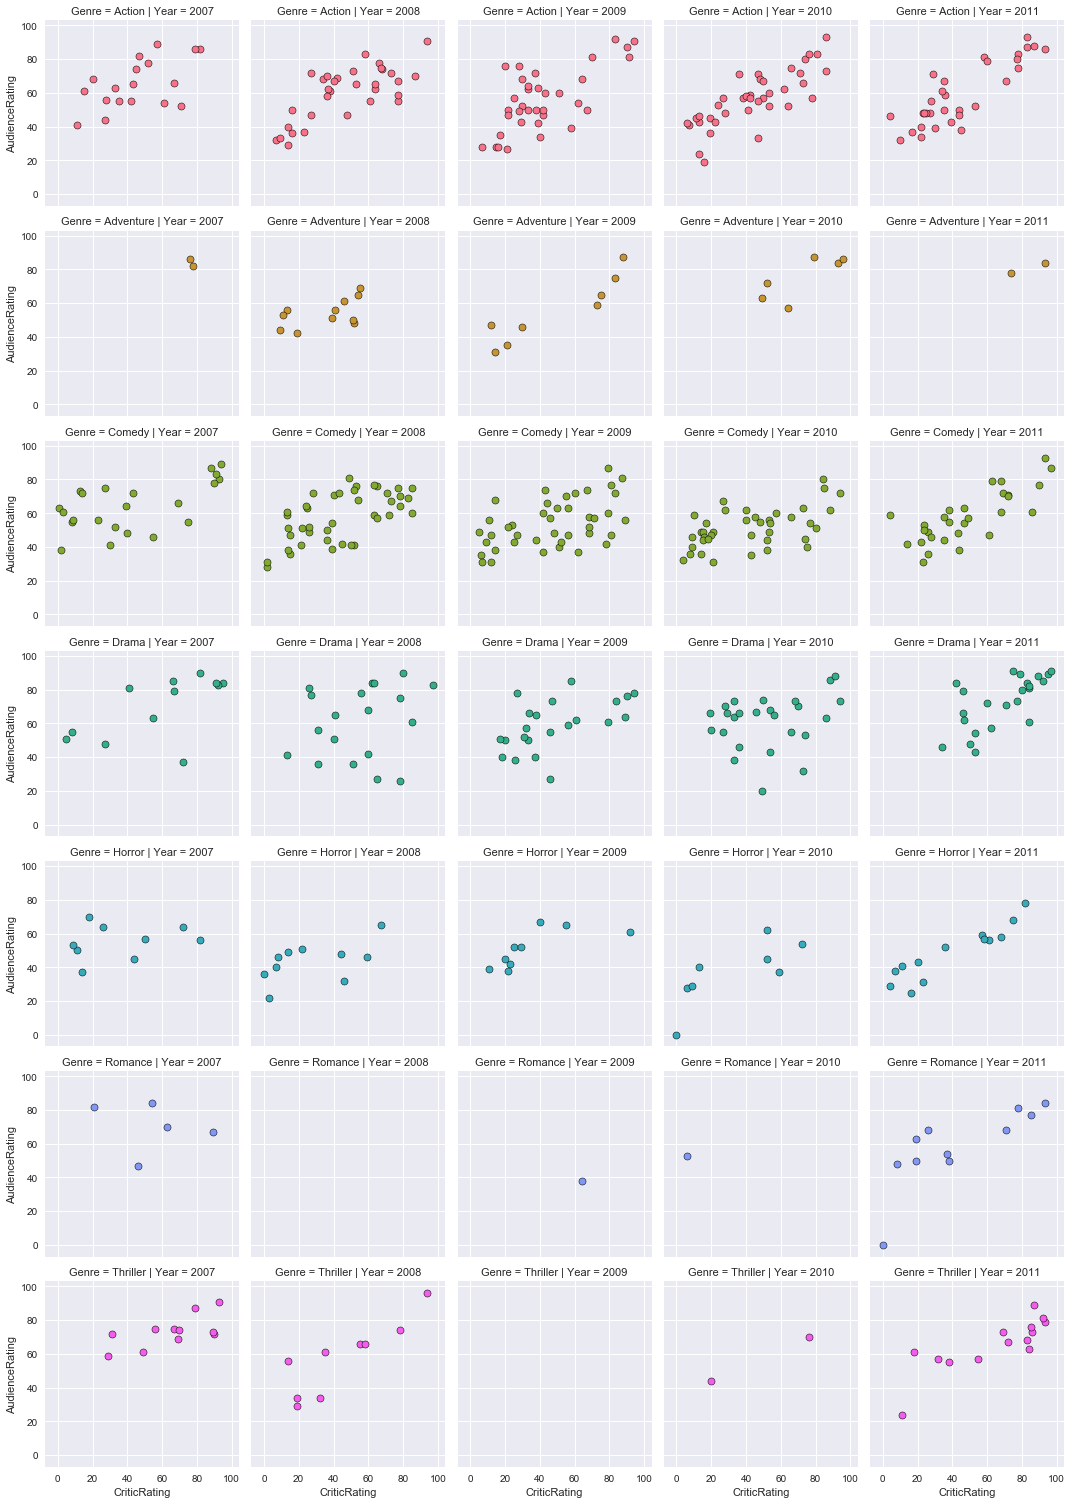

In [174]:
# back to scatter plots
# add keyword arguments


g = sns.FacetGrid(movies, row="Genre",col="Year", hue="Genre")
kws = dict(s=50, linewidth=0.5, edgecolor="black")
g = g.map(plt.scatter, "CriticRating", "AudienceRating", **kws)

In [175]:
# coordinates and diagonals 

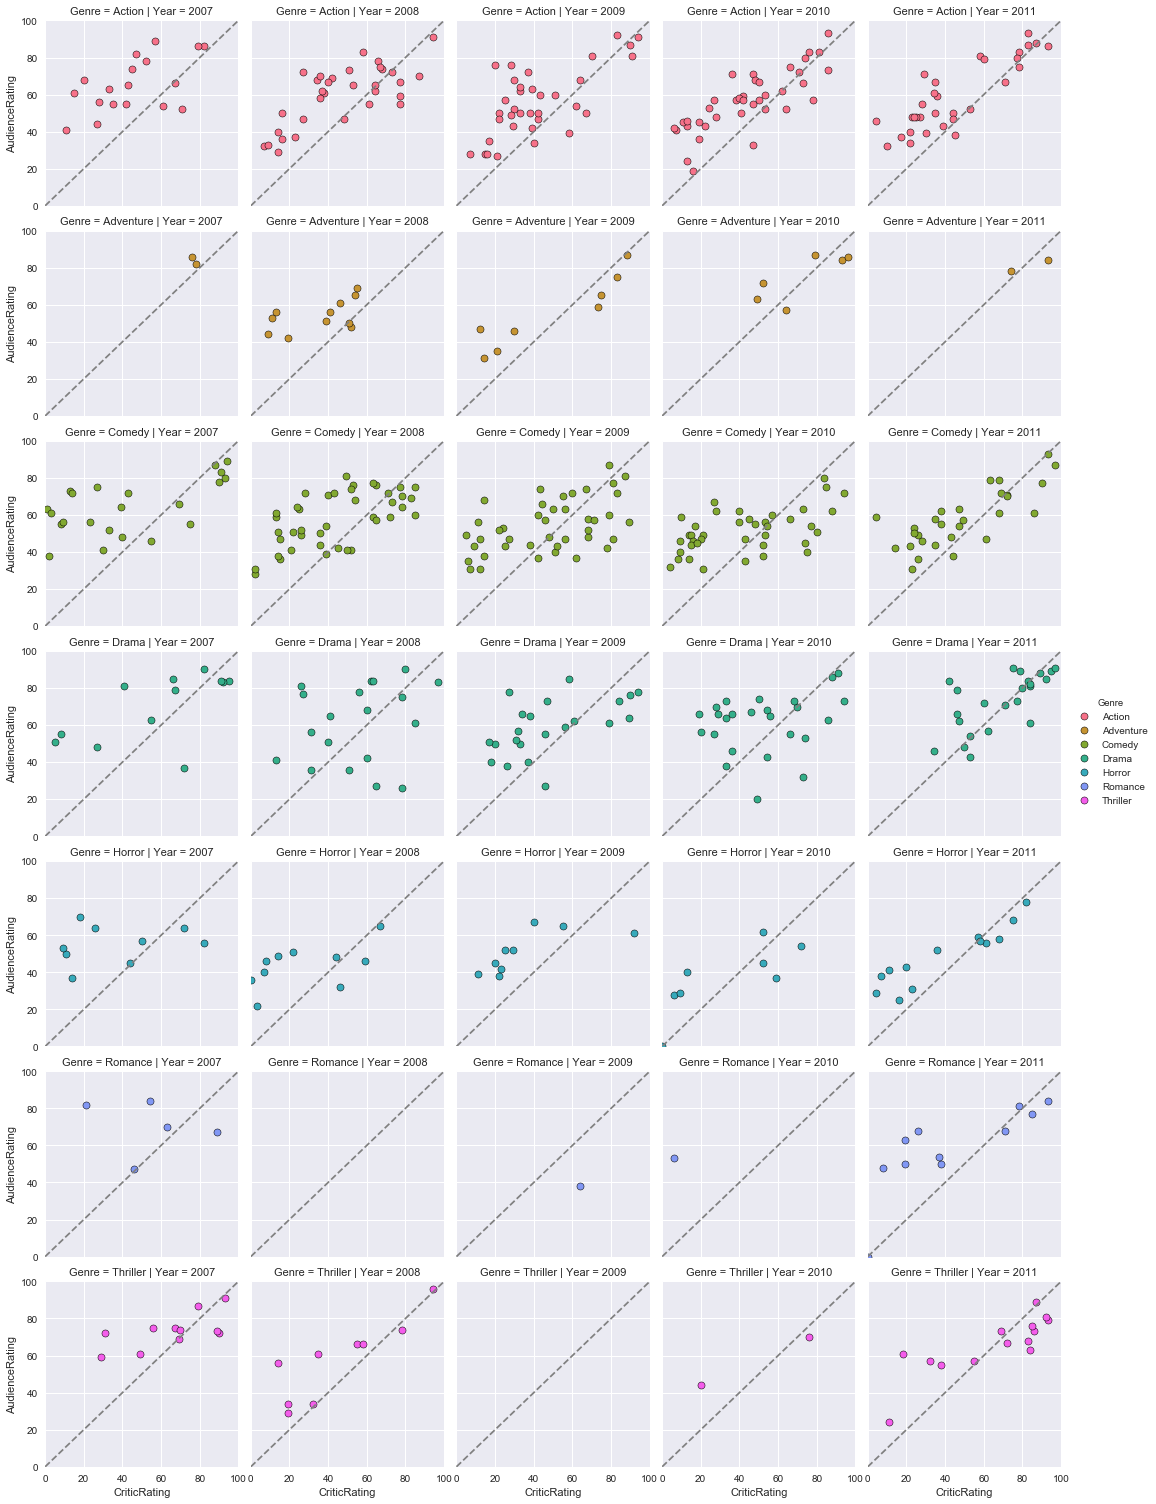

In [180]:
# controlling axis and adding diagonals 
g = sns.FacetGrid(movies, row="Genre",col="Year", hue="Genre")
kws = dict(s=50, linewidth=0.5, edgecolor="black")
g = g.map(plt.scatter, "CriticRating", "AudienceRating", **kws)
g.set(xlim = (0,100), ylim=(0,100))

#loop throughto add the diagonal 
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c="gray", ls="--")

#add a legend
g.add_legend()

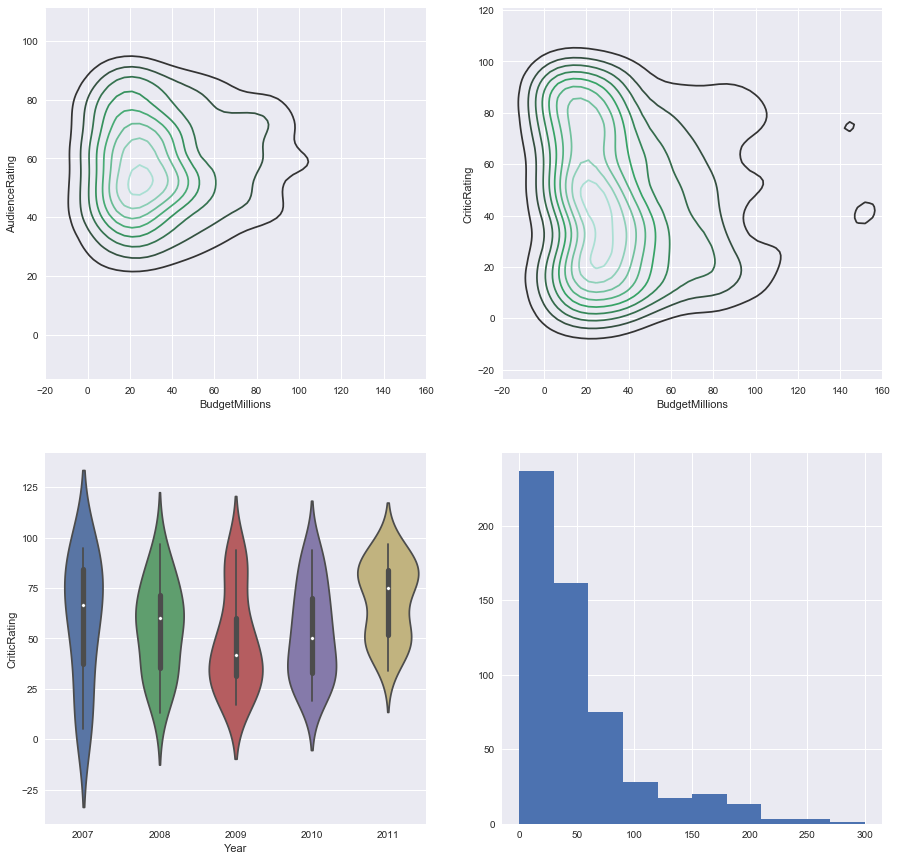

In [191]:
###BUILDING DASHBOARDS IN PYTHON 

sns.set_style("darkgrid")
f, axes = plt.subplots(2,2, figsize=(15,15))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1])
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))

x = sns.violinplot(data=movies[movies.Genre=="Drama"], x="Year", y="CriticRating", ax=axes[1,0])
"""k3 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap="Reds", ax=axes[1,1])
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=False, shade_lowest=False, cmap="Reds", ax=axes[1,1])
"""

#you have to add non seaborn charts in a different way. see below. this is a pyplot object 
axes[1,1].hist(movies.BudgetMillions)
plt.show()

In [195]:
"""ValueError: Colormap Bluess is not recognized. Possible values are: 
Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, 
CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, 
Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, 
Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, 
PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, 
RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, 
Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, 
Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, 
Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, 
YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, 
binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, 
coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, 
flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, 
gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, 
gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, 
gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, 
inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, 
ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, 
rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, 
summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, 
tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r"""
print("")

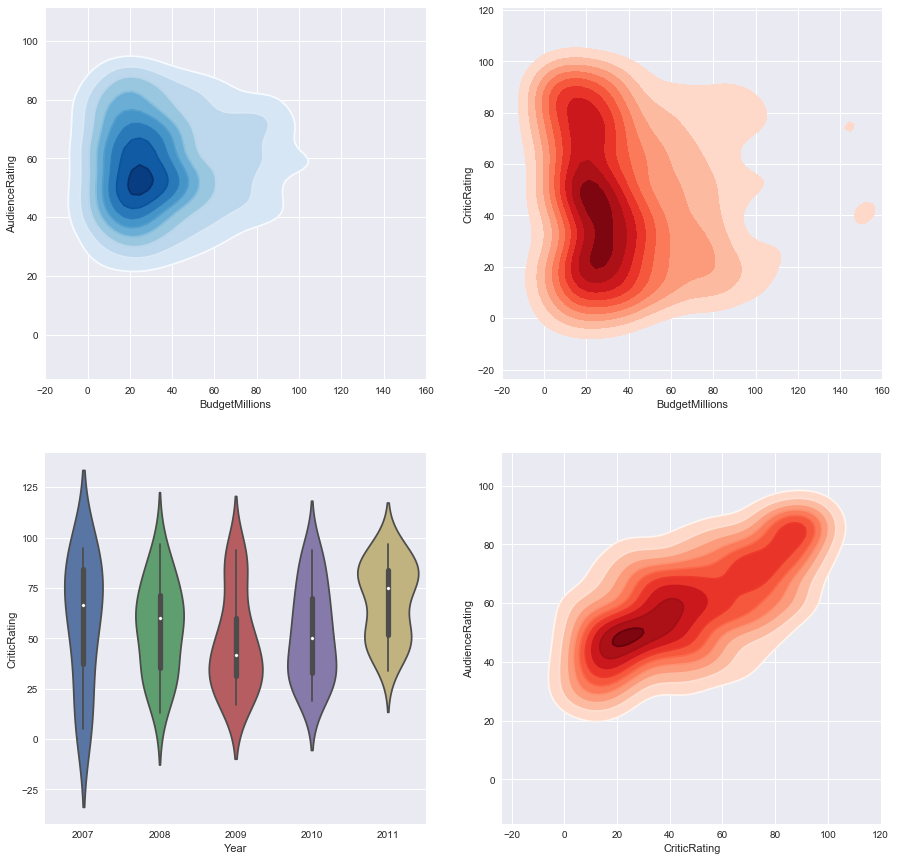

In [196]:
###BUILDING DASHBOARDS IN PYTHON 

sns.set_style("darkgrid")
f, axes = plt.subplots(2,2, figsize=(15,15))
#plot 0,0
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, shade=True, shade_lowest=False, cmap="Blues", ax=axes[0,0])
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, cmap="Blues", ax=axes[0,0])
#plot 0,1
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, shade=True, shade_lowest=False, cmap="Reds", ax=axes[0,1])
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))

#plot 1,0
x = sns.violinplot(data=movies[movies.Genre=="Drama"], x="Year", y="CriticRating", ax=axes[1,0])

#plot 1,1
k3 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap="Reds", ax=axes[1,1])
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=False, shade_lowest=False, cmap="Reds", ax=axes[1,1])

plt.show()

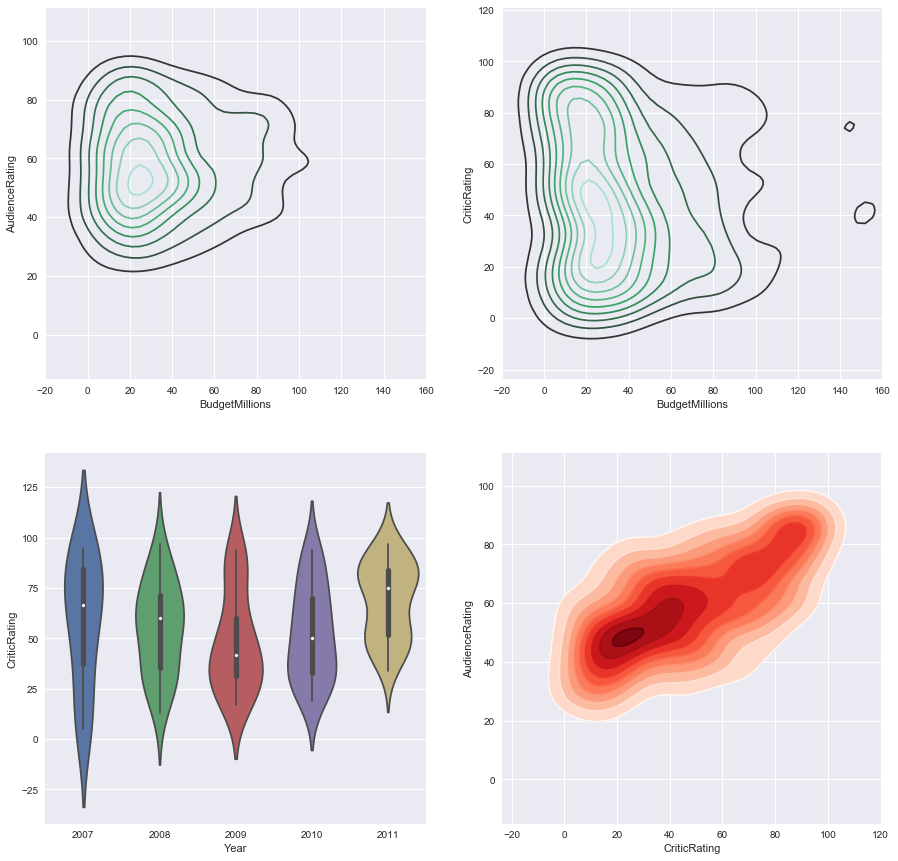

In [197]:
### styling our dashboards

#make them look interesting to read. 

sns.set_style("darkgrid")
f, axes = plt.subplots(2,2, figsize=(15,15))

k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1])
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))

x = sns.violinplot(data=movies[movies.Genre=="Drama"], x="Year", y="CriticRating", ax=axes[1,0])
k3 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap="Reds", ax=axes[1,1])
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=False, shade_lowest=False, cmap="Reds", ax=axes[1,1])

plt.show()

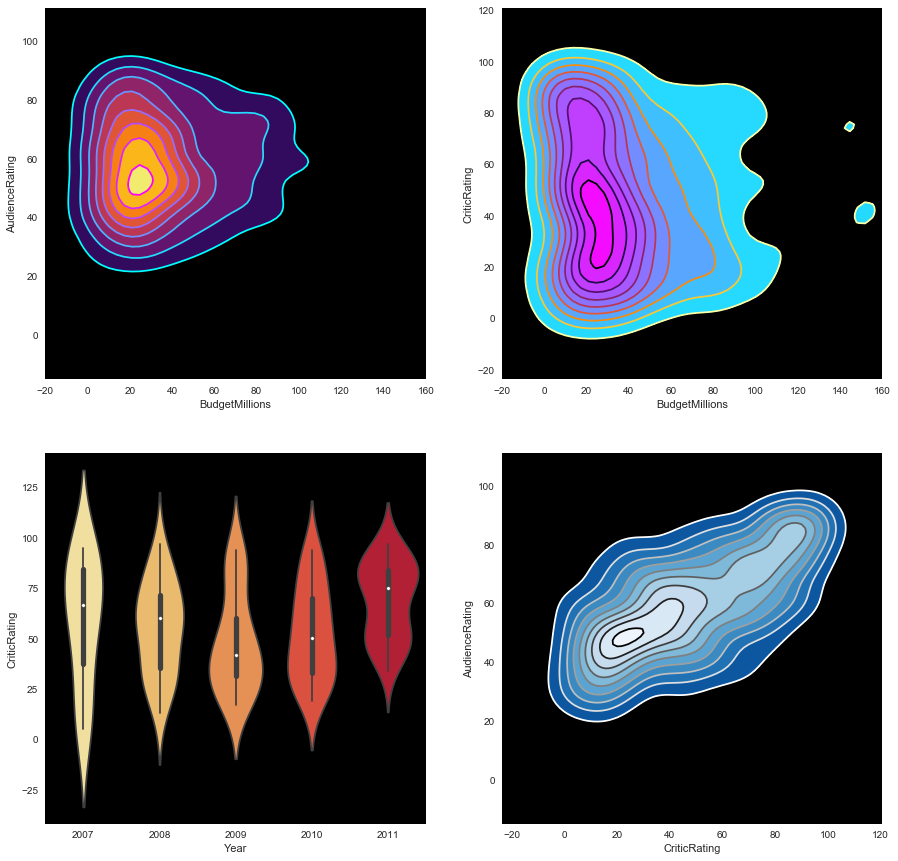

In [207]:

#changed the background to black here
sns.set_style("dark", {"axes.facecolor": "black"})
f, axes = plt.subplots(2,2, figsize=(15,15))
#plot 0,0
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, shade=True, shade_lowest=False, cmap="inferno", ax=axes[0,0])
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, cmap="cool", ax=axes[0,0])
#plot 0,1
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, shade=True, shade_lowest=False, cmap="cool", ax=axes[0,1])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, cmap="inferno_r", ax=axes[0,1])
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))

#plot 1,0
x = sns.violinplot(data=movies[movies.Genre=="Drama"], x="Year", y="CriticRating", ax=axes[1,0], palette = "YlOrRd")

#plot 1,1
k3 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap="Blues_r", ax=axes[1,1])
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=False, shade_lowest=False, cmap="gist_gray_r", ax=axes[1,1])

plt.show()

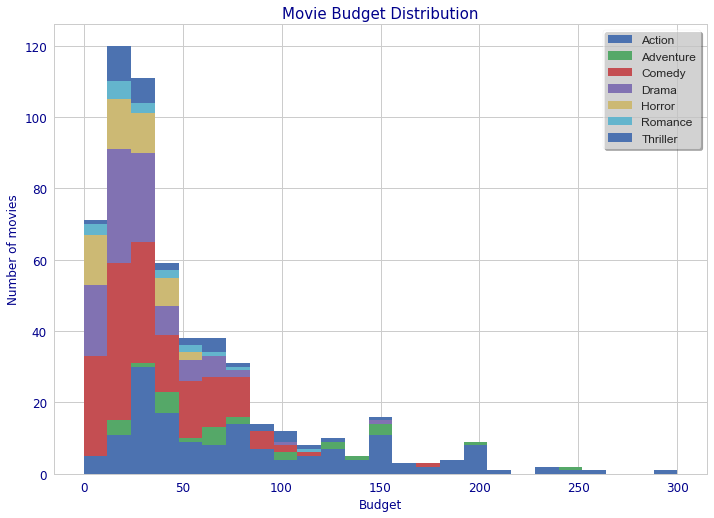

In [235]:
# finishing touches 

sns.set_style("whitegrid")

x = [] 
y = []
for i in movies.Genre.cat.categories:
    x.append(movies[movies.Genre == i].BudgetMillions) 
    y.append(i)

#this is a good hack to make any plot a different size using subplot 
fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.27) # size of a4
h = plt.hist(x, bins=25, stacked=True, rwidth=1, label=y)
plt.title("Movie Budget Distribution",fontsize = 15, color="DarkBlue", fontname = "Console")
plt.ylabel("Number of movies",fontsize = 12, color="DarkBlue", fontname = "Console")
plt.xlabel("Budget",fontsize = 12, color="DarkBlue", fontname = "Console")
plt.yticks(fontsize=12, fontname = "Console", color="DarkBlue")
plt.xticks(fontsize=12, fontname = "Console", color="DarkBlue")
plt.legend(prop={"size":12},frameon=True, fancybox=True, shadow=True, framealpha=0.5)
plt.show()


In [237]:
####homework 

"""

The movie reviews website was very happy with your deliverable for the 
previous assignment and now they have a new request for you.
The previous consultant had created a chart for them which is illustrated on 
the next slide. However the Python code used to create the diagram has 
since been lost and cannot be recovered. Your task is to come up with the 
code that will re
-
create the same chart making it look as close as possible 
to the original
A new dataset has been supplied. 

"""

print("")

In [274]:
# we need to create a 
# box plot
# and a 
# scatter plot 
#and overlay them onto a subplot()

#hint 1 remove tristar and unwanted genre

In [275]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [276]:
mov = pd.read_csv(r"C:\Users\chida\Python A-Z_Section 6_Homework-Data.csv", encoding = 'latin1')

In [277]:
mov.columns = ['DayOfWeek', 'Director', 'Genre', 'MovieTitle', 'ReleaseDate','Studio', 'AdjustedGrossMillions', 'BudgetMillions', 'GrossMillions', 'IMDDRating', 'MovieLensRating', 'OverseasMillions', 'OverseasPerc', 'ProfitMillion', 'ProfitPerc', 'RuntimeMins', 'USMillion', 'GrossPercUS']

In [278]:
mov.head()
mov.info()
mov.describe()
mov.head()

StudioList = ["Buena Vista Studios", "Sony", "Universal", "WB", "Paramount Pictures", "Fox"]
GenreList = ["action", "comedy", "adventure", "animation", "drama"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
DayOfWeek                608 non-null object
Director                 608 non-null object
Genre                    608 non-null object
MovieTitle               608 non-null object
ReleaseDate              608 non-null object
Studio                   608 non-null object
AdjustedGrossMillions    608 non-null object
BudgetMillions           608 non-null float64
GrossMillions            608 non-null object
IMDDRating               608 non-null float64
MovieLensRating          608 non-null float64
OverseasMillions         608 non-null object
OverseasPerc             608 non-null float64
ProfitMillion            608 non-null object
ProfitPerc               608 non-null float64
RuntimeMins              608 non-null int64
USMillion                608 non-null float64
GrossPercUS              608 non-null float64
dtypes: float64(7), int64(1), object(10)
memory usage: 85.6+ KB


In [279]:
mov.Studio = mov.Studio.astype("category")
mov.Genre = mov.Genre.astype("category")

mov.Genre.cat.categories
mov.Studio.cat.categories

Index(['Art House Studios', 'Buena Vista Studios', 'Colombia Pictures',
       'Dimension Films', 'Disney', 'DreamWorks', 'Fox',
       'Fox Searchlight Pictures', 'Gramercy Pictures', 'IFC', 'Lionsgate',
       'Lionsgate Films', 'Lionsgate/Summit', 'MGM', 'MiraMax',
       'New Line Cinema', 'New Market Films', 'Orion',
       'Pacific Data/DreamWorks', 'Paramount Pictures', 'Path_ Distribution',
       'Relativity Media', 'Revolution Studios', 'Screen Gems', 'Sony',
       'Sony Picture Classics', 'StudioCanal', 'Summit Entertainment',
       'TriStar', 'UA Entertainment', 'USA', 'Universal', 'Vestron Pictures',
       'WB', 'WB/New Line', 'Weinstein Company'],
      dtype='object')

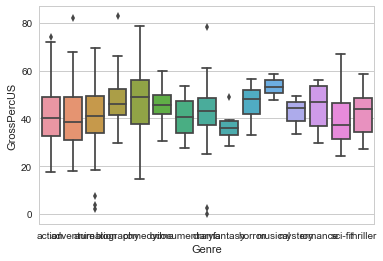

In [281]:
# CREATE THE BOX PLOT 
movies.Genre == "Action"
b1 = sns.boxplot(data=mov, x="Genre", y="GrossPercUS")

In [296]:
Stud = []
Gen = []
for i in StudioList:
    Stud.append(mov[mov.Genre==i])
for j in GenreList:
    Gen.append(mov[mov.Genre==j])

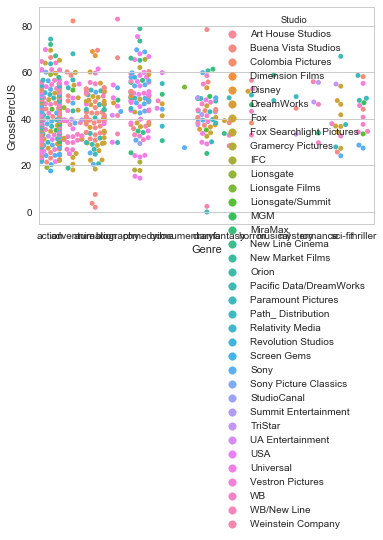

In [302]:
# CREATE THE SCATTER PLOT 

s1 = sns.swarmplot(data=mov, x=mov.Genre, y =mov.GrossPercUS, zorder=0, hue="Studio")

In [ ]:
#### the actual chart